# `matplotlib` stacked plot with hatching

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from matplotlib import font_manager

# And system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [3]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Data

In [4]:
cols = 10
rows = 4

data = (
    np.reshape(np.arange(0, cols, 1), (1, -1)) ** 2
    + np.reshape(np.arange(0, rows), (-1, 1))
    + np.random.random((rows, cols))*5
)

data

array([[ 1.01874757,  1.49268691,  4.72504872, 11.72455367, 19.34347852,
        26.66609605, 39.90699179, 53.06130174, 64.04196107, 83.09053488],
       [ 4.8070704 ,  4.08220348,  5.08141194, 10.13366995, 19.59982388,
        26.8822187 , 38.84824605, 53.16286735, 69.5628849 , 84.4839948 ],
       [ 6.49380513,  6.169696  ,  7.35489227, 15.86819967, 22.34877515,
        27.00195345, 39.6257001 , 52.04973175, 66.34710395, 84.77609147],
       [ 5.59687517,  8.38953527, 11.06565473, 13.96623779, 19.8681838 ,
        29.77143578, 42.0021492 , 54.7132035 , 69.14170195, 86.89462048]])

## Bare Plot

In [5]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 22,
        "hatch.linewidth": .75,
        "hatch.color": "black",
    }
)

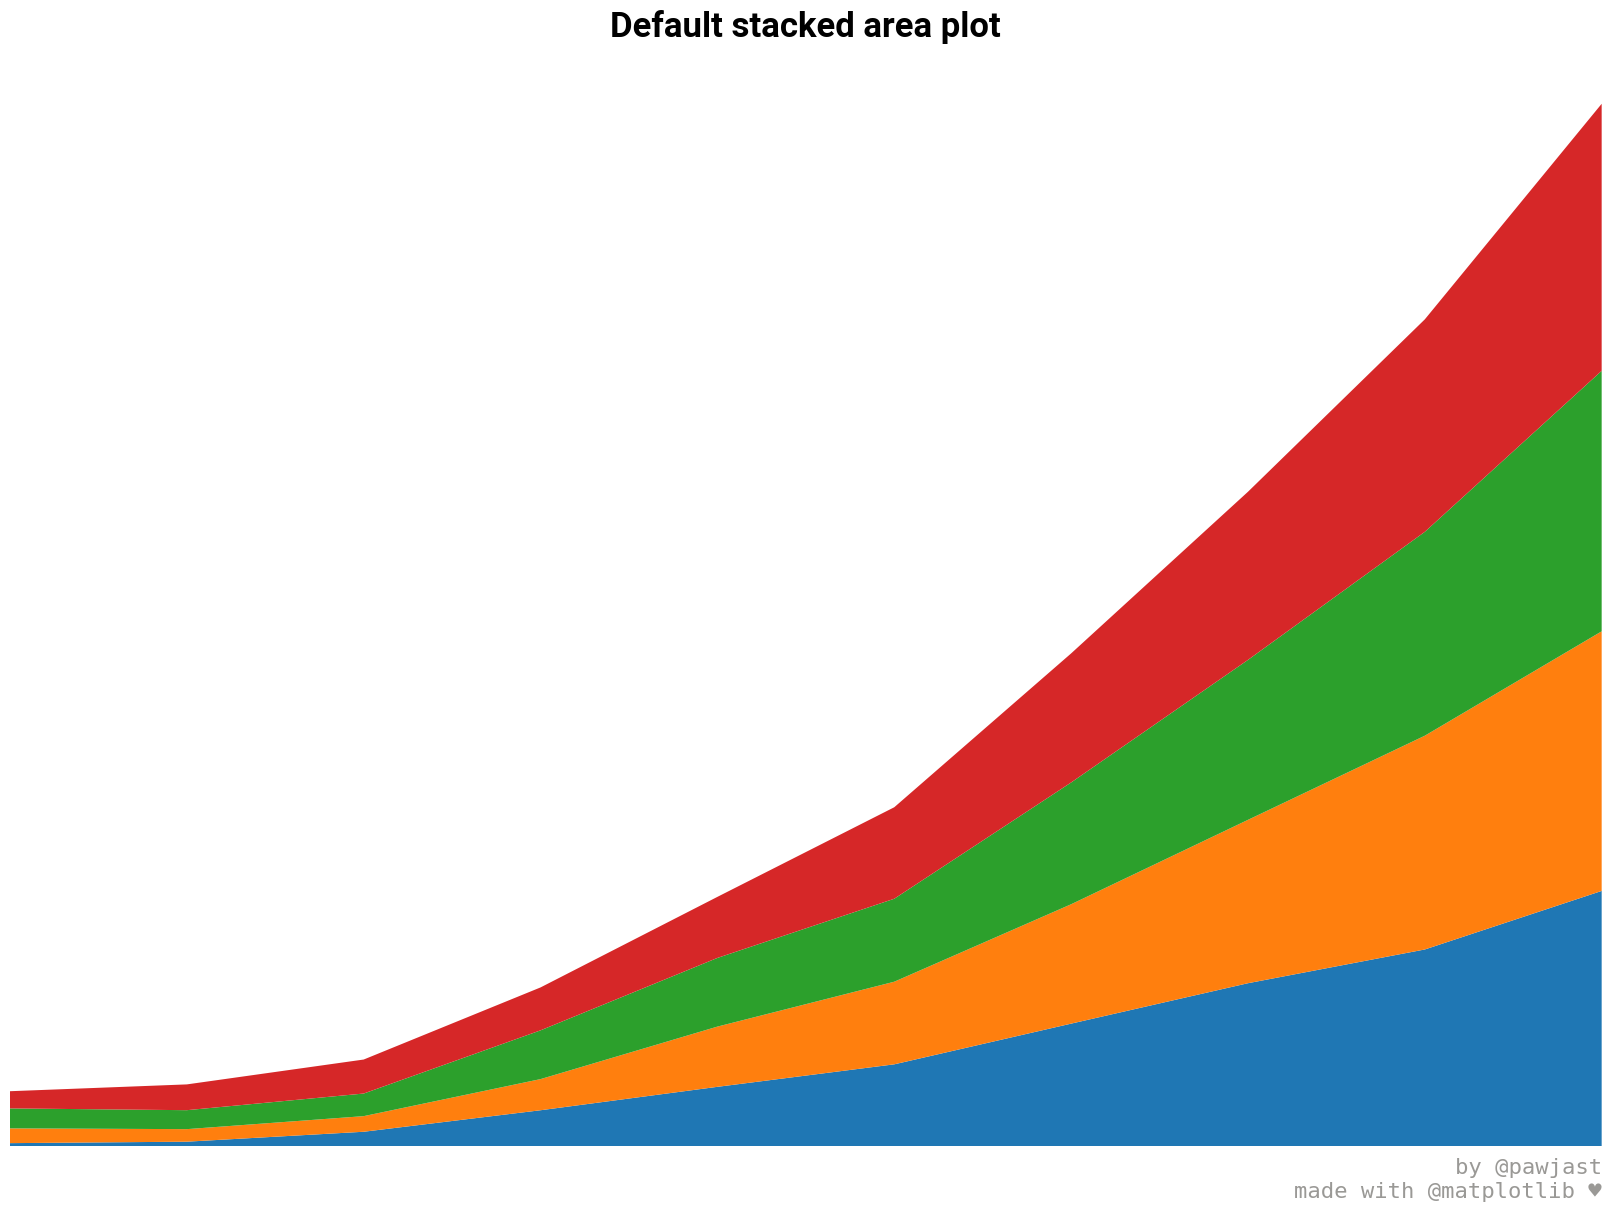

In [6]:
fig, ax = plt.subplots(
    figsize=(16,12),
    facecolor="white",
    layout="constrained"
)
fig.suptitle(
    "Default stacked area plot",
    fontsize=25,
    weight="bold"
)
x = range(data.shape[1])
ax.stackplot(
    x, data
)

ax.set_xlim(0, 9)
ax.axis("off")

# Footer
ax.text(
    1, -0.05,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);


# plt.savefig(
#     fname="name.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

## Plot with Basic hatch

It's impossible to pass hatch as a list so there is one hatch patter per data series.

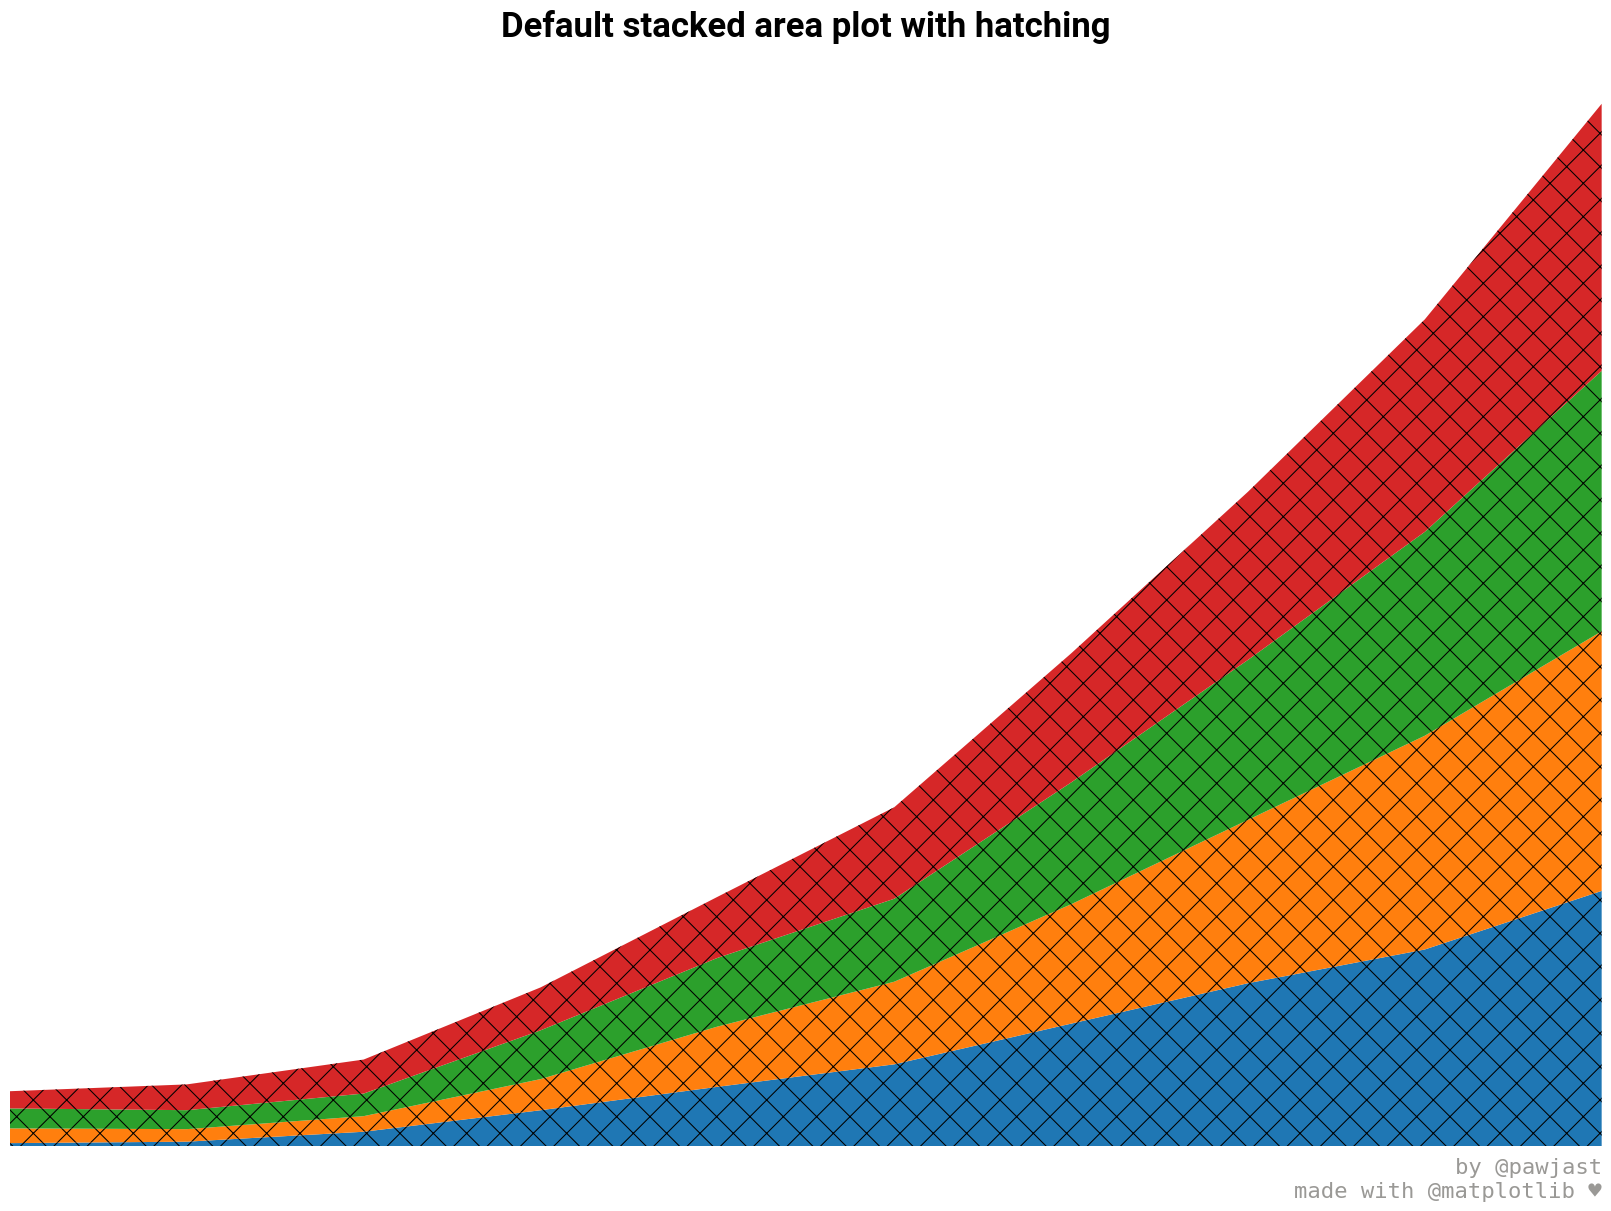

In [7]:
fig, ax = plt.subplots(
    figsize=(16,12),
    facecolor="white",
    layout="constrained"
)
fig.suptitle(
    "Default stacked area plot with hatching",
    fontsize=25,
    weight="bold"
)
x = range(data.shape[1])
ax.stackplot(
    x, data,
    hatch="x"
)

ax.set_xlim(0, 9)
ax.axis("off")

# Footer
ax.text(
    1, -0.05,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="name.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

## Individual hatch

Text(1, -0.05, 'by @pawjast\nmade with @matplotlib ♥')

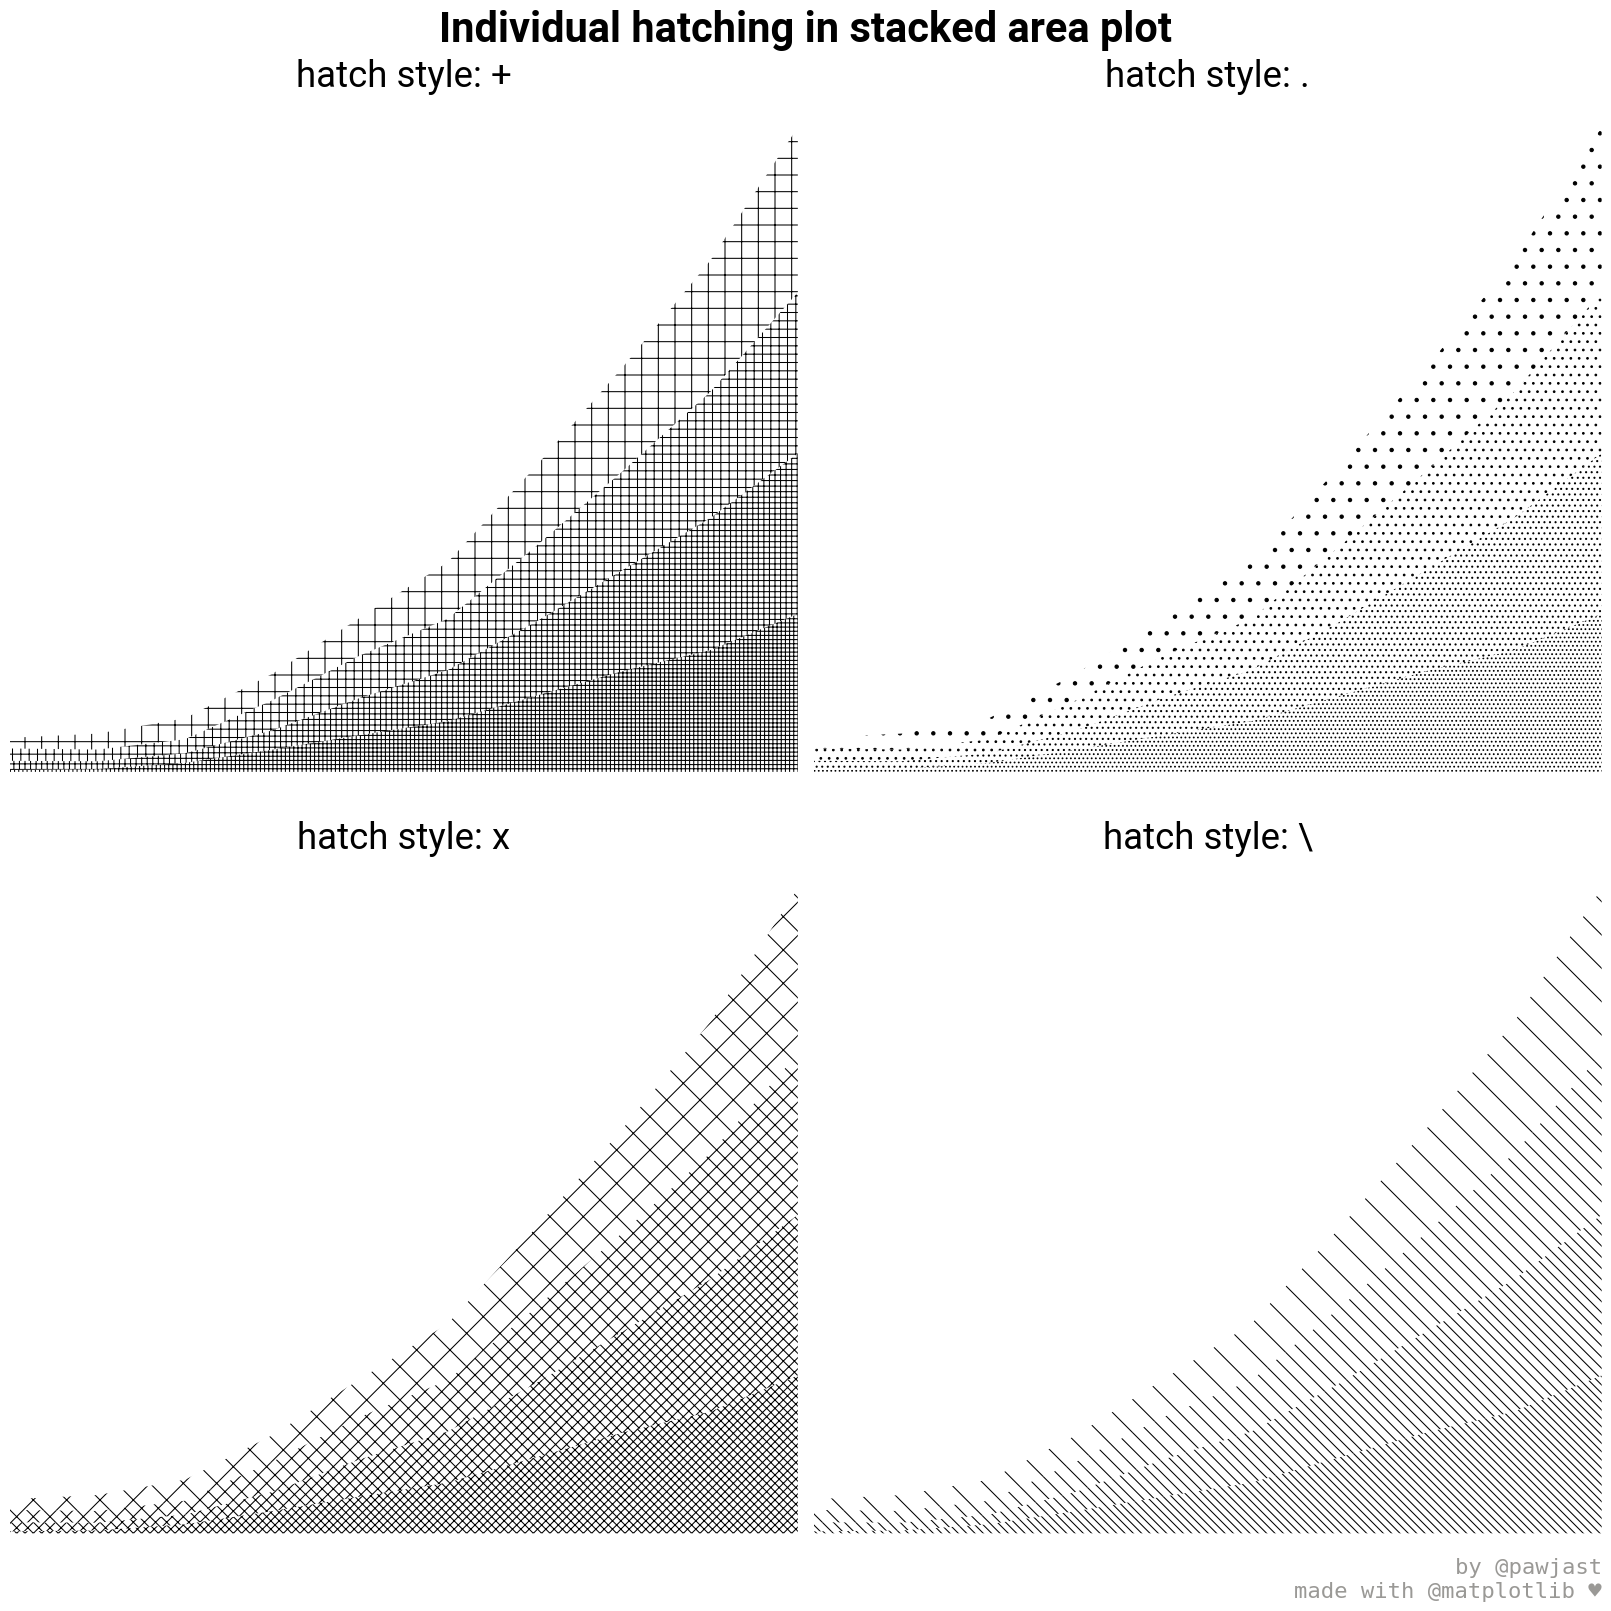

In [8]:
fig, axs = plt.subplot_mosaic(
    mosaic="AB\nCD",
    figsize=(16,16),
    facecolor="white",
    sharex=True,
    layout="constrained"
)
fig.suptitle(
    "Individual hatching in stacked area plot",
    fontsize=30,
    weight="bold"
)

axs["A"].set_xlim(0, 9)

x = range(data.shape[1])
for a, h in zip(axs, ["+", ".", "x", "\\"]):
    axs[a].set_title(f"hatch style: {h}")
    axs[a].axis("off")
    stack_baseline = np.zeros((data.shape[1]))
    for i, y in enumerate(data):
        axs[a].fill_between(
            x, stack_baseline, y+stack_baseline,
            facecolor=(1, 1, 1, 0),
            hatch=h*(data.shape[0]-i)
        )
        stack_baseline += y

# Footer
axs["D"].text(
    1, -0.05,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = axs["D"].transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# plt.savefig(
#     fname="pawjast1.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

## With colours

Palette used:

https://coolors.co/palette/ef476f-ffd166-06d6a0-118ab2-073b4c

Text(1, -0.05, 'by @pawjast\nmade with @matplotlib ♥')

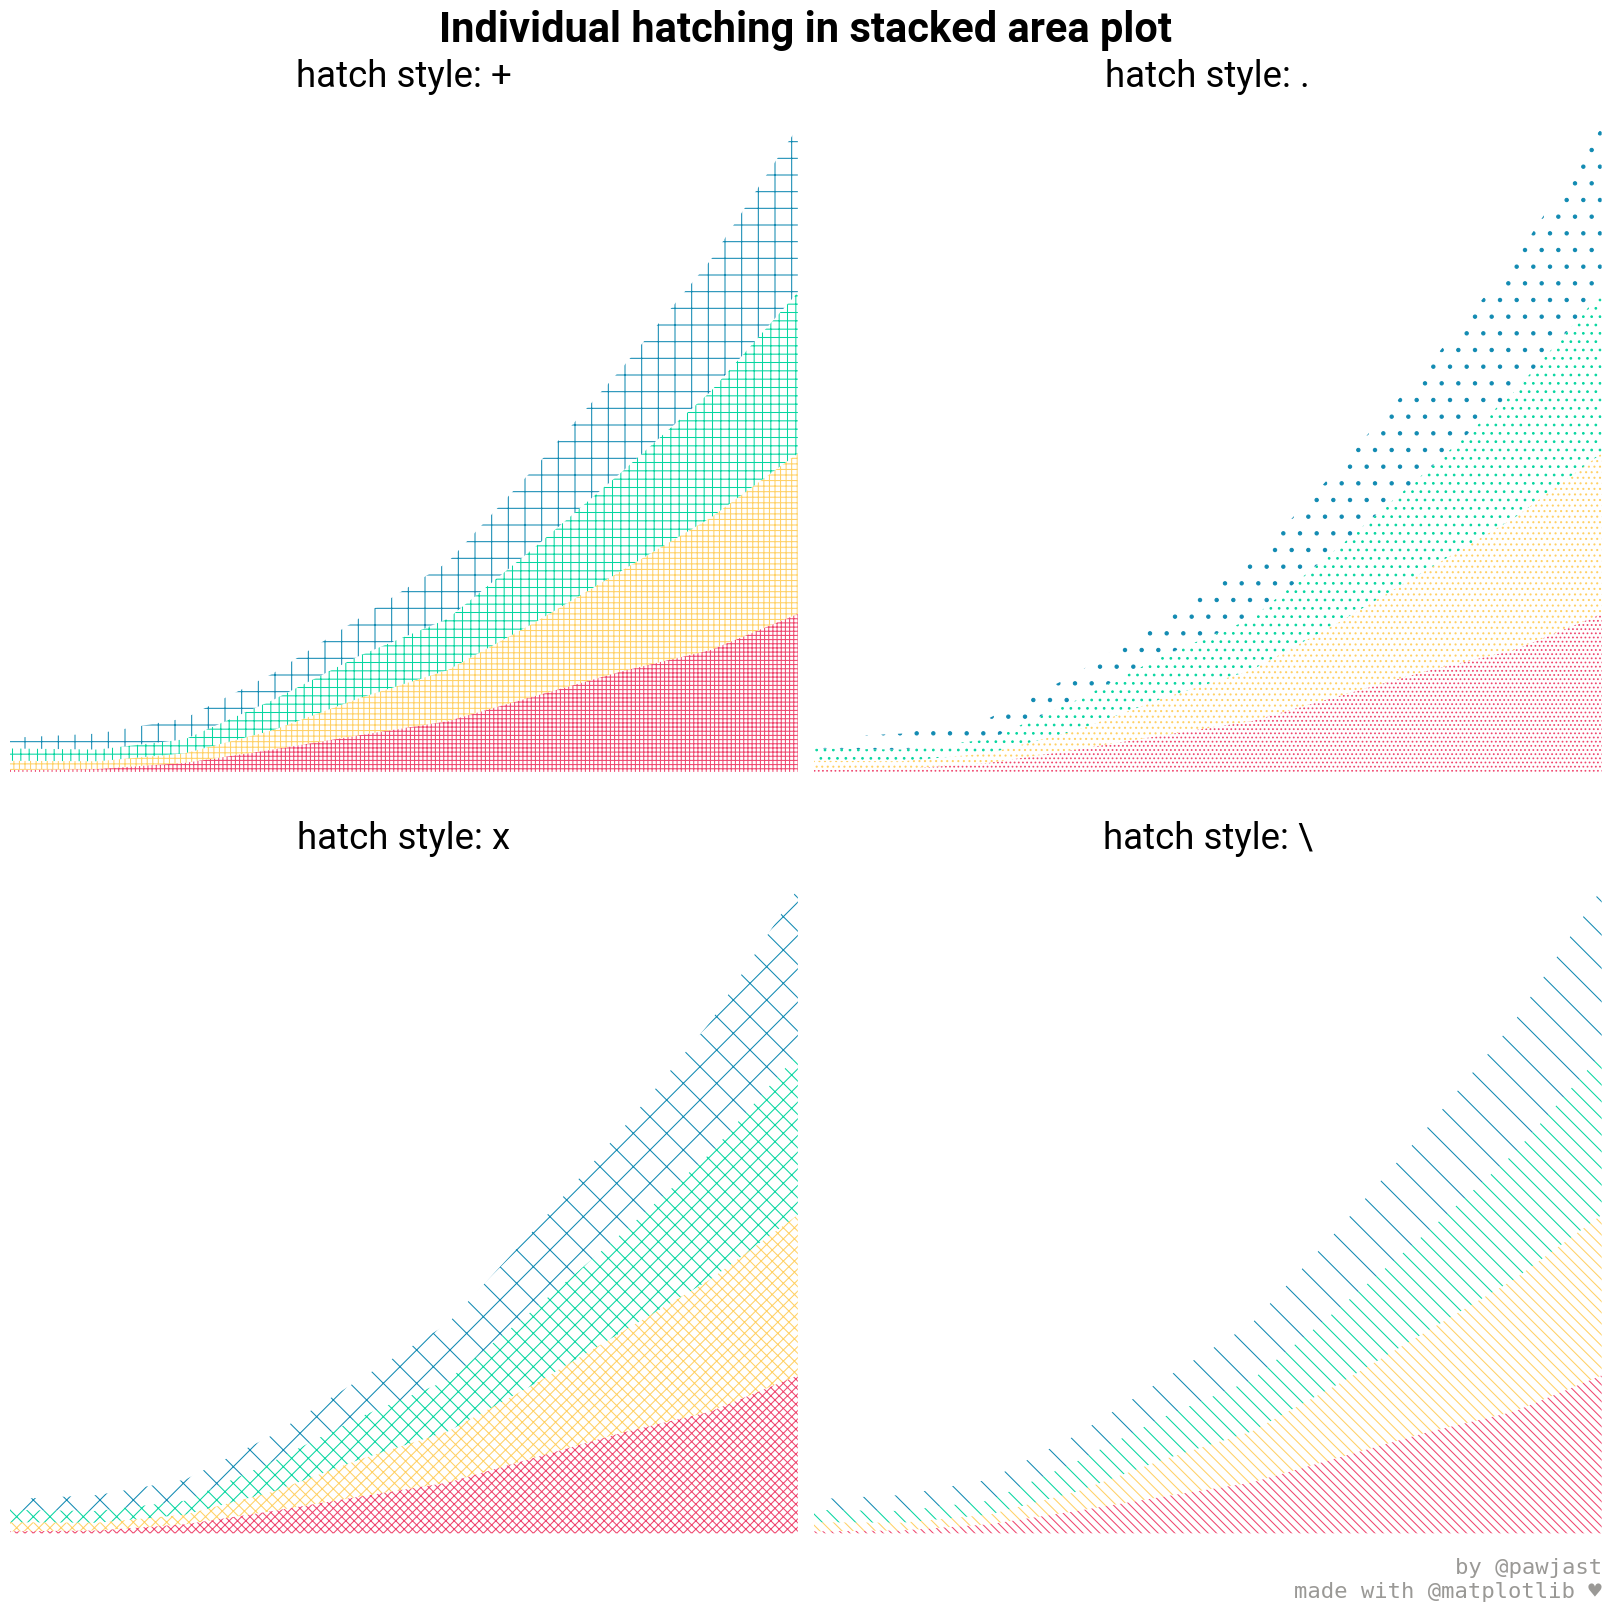

In [9]:
fig, axs = plt.subplot_mosaic(
    mosaic="AB\nCD",
    figsize=(16,16),
    facecolor="white",
    sharex=True,
    layout="constrained"
)
fig.suptitle(
    "Individual hatching in stacked area plot",
    fontsize=30,
    weight="bold"
)

axs["A"].set_xlim(0, 9)

x = range(data.shape[1])
for a, h in zip(axs, ["+", ".", "x", "\\"]):
    colours = iter(
        [
            "EF476F",
            "FFD166",
            "06D6A0",
            "118AB2",
            "073B4C",
        ]
    )

    axs[a].set_title(f"hatch style: {h}")
    axs[a].axis("off")

    stack_baseline = np.zeros((data.shape[1]))
    for i, y in enumerate(data):
        plt.rcParams["hatch.color"] = next(colours)
        axs[a].fill_between(
            x, stack_baseline, y+stack_baseline,
            facecolor=(1, 1, 1, 0),
            hatch=h*(data.shape[0]-i)
        )
        stack_baseline += y

# Footer
axs["D"].text(
    1, -0.05,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = axs["D"].transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# plt.savefig(
#     fname="pawjast2.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );